Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Importing the train and test datasets

In [3]:
df_train = pd.read_csv(r"D:\Chinnu\Feynn Labs\dataset\train_u6lujuX_CVtuZ9i.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test = pd.read_csv(r"D:\Chinnu\Feynn Labs\dataset\test_Y3wMUE5_7gLdaTN.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Creating bar plot using the Seaborn library

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

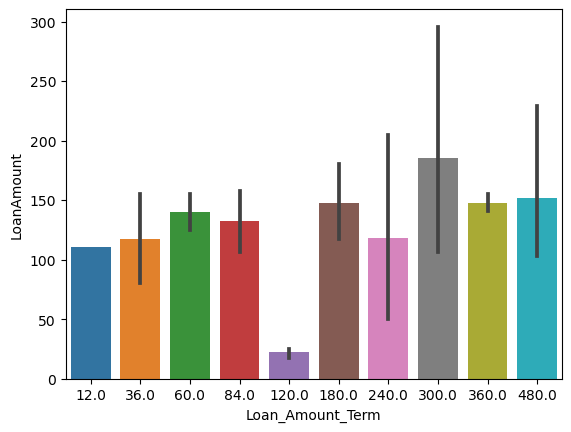

In [6]:
sns.barplot(x = df_train['Loan_Amount_Term'], y = df_train['LoanAmount'])

Identifying Missing Values

In [7]:
df_train[['Loan_Amount_Term', 'LoanAmount']][df_train['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


In [8]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df_train['Dependents'].replace('3+',3,inplace = True)
df_train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [10]:
df_train[['Dependents', 'Married']][df_train['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


Filling Missing Values

In [11]:
df_train['Gender'].fillna('Male', inplace = True)
df_train['Married'].fillna('Yes', inplace = True)
df_train['Self_Employed'].fillna('No', inplace = True)
df_train['Credit_History'].fillna('1.0', inplace = True)
df_train['LoanAmount'].fillna((df_train['LoanAmount'].mean()), inplace = True)
df_train['Loan_Amount_Term'].fillna('84', inplace = True)
df_train['Dependents'].fillna(0, inplace = True)

In [12]:
df_train['Dependents'] = df_train['Dependents'].astype('int')
df_train['Dependents'].dtype

dtype('int32')

Missing Value Detection

In [13]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Dropping Columns

In [14]:
df_train.drop('Loan_ID', axis=1, inplace=True)

Number of Unique Values in each column

In [15]:
df_train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

Summary Statistics

In [16]:
df_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162
std,1.009623,6109.041673,2926.248369,84.037468
min,0.000000,150.000000,0.000000,9.000000
25%,0.000000,2877.500000,0.000000,100.250000
50%,0.000000,3812.500000,1188.500000,129.000000
75%,1.000000,5795.000000,2297.250000,164.750000
max,3.000000,81000.000000,41667.000000,700.000000


Box Plot Visualization

<Figure size 1000x400 with 0 Axes>

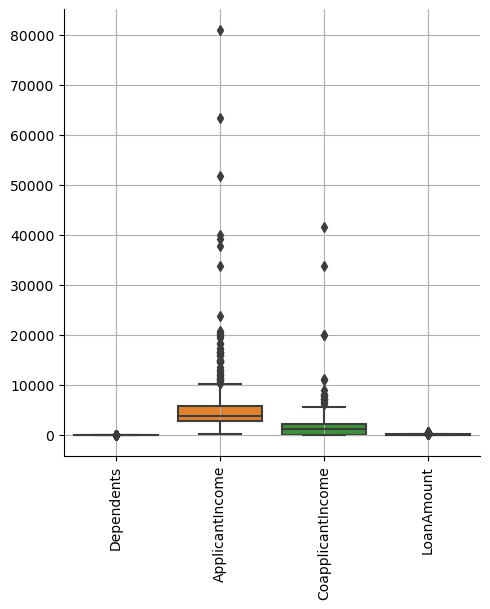

In [17]:
plt.figure(figsize = (10,4))
sns.catplot(data = df_train, kind = 'box')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Frequency Plot

<Axes: xlabel='Education', ylabel='count'>

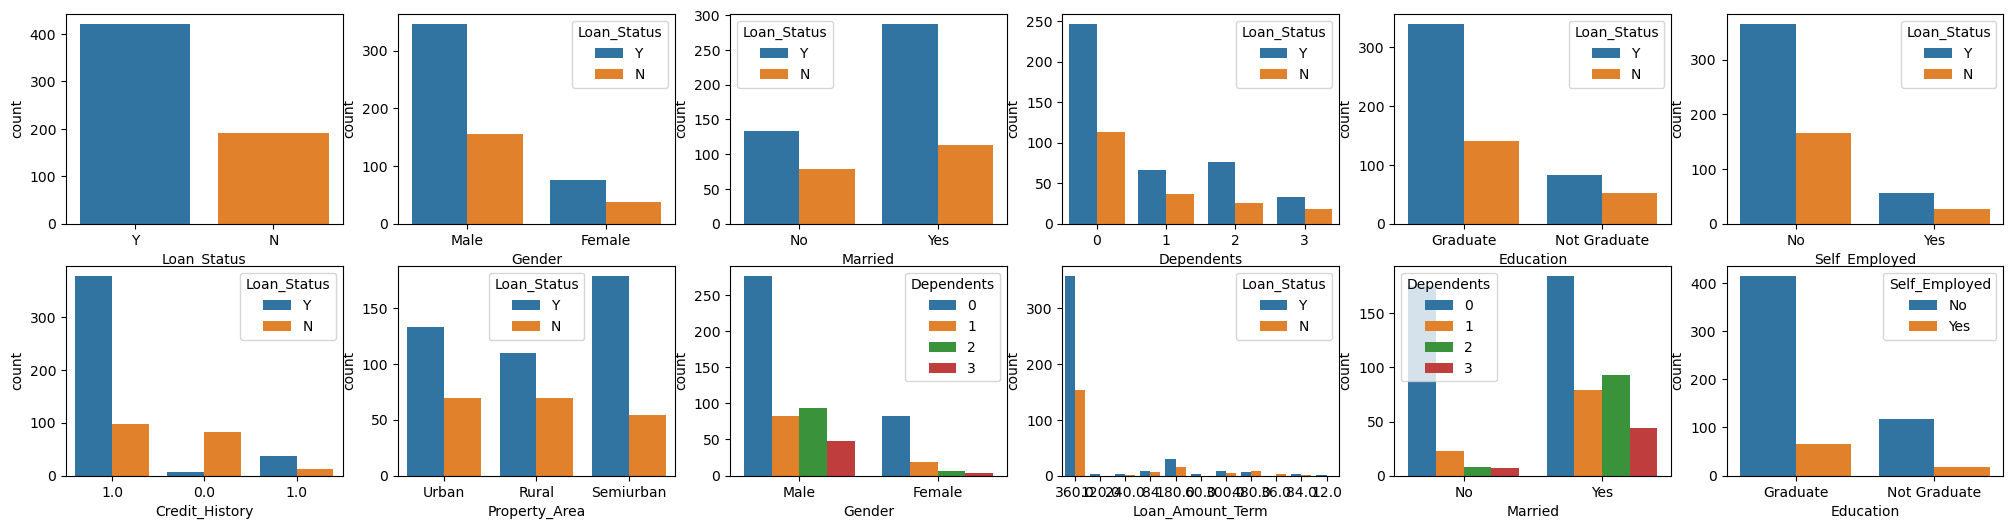

In [18]:
fig, axs = plt.subplots(figsize = (25,6), ncols = 6, nrows = 2)
sns.countplot(x = df_train['Loan_Status'], ax = axs[0,0])
sns.countplot(x = df_train['Gender'], hue = df_train['Loan_Status'], ax = axs[0,1])
sns.countplot(x = df_train['Married'], hue = df_train['Loan_Status'], ax = axs[0,2])
sns.countplot(x = df_train['Dependents'], hue = df_train['Loan_Status'], ax = axs[0,3])
sns.countplot(x = df_train['Education'], hue = df_train['Loan_Status'], ax = axs[0,4])
sns.countplot(x = df_train['Self_Employed'], hue = df_train['Loan_Status'], ax = axs[0,5])

sns.countplot(x = df_train['Credit_History'], hue = df_train['Loan_Status'], ax = axs[1,0])
sns.countplot(x = df_train['Property_Area'], hue = df_train['Loan_Status'], ax = axs[1,1])
sns.countplot(x = df_train['Gender'], hue = df_train['Dependents'], ax = axs[1,2])
sns.countplot(x = df_train['Loan_Amount_Term'], hue = df_train['Loan_Status'], ax = axs[1,3])
sns.countplot(x = df_train['Married'], hue = df_train['Dependents'], ax = axs[1,4])
sns.countplot(x = df_train['Education'], hue = df_train['Self_Employed'], ax = axs[1,5])

Data Visualization

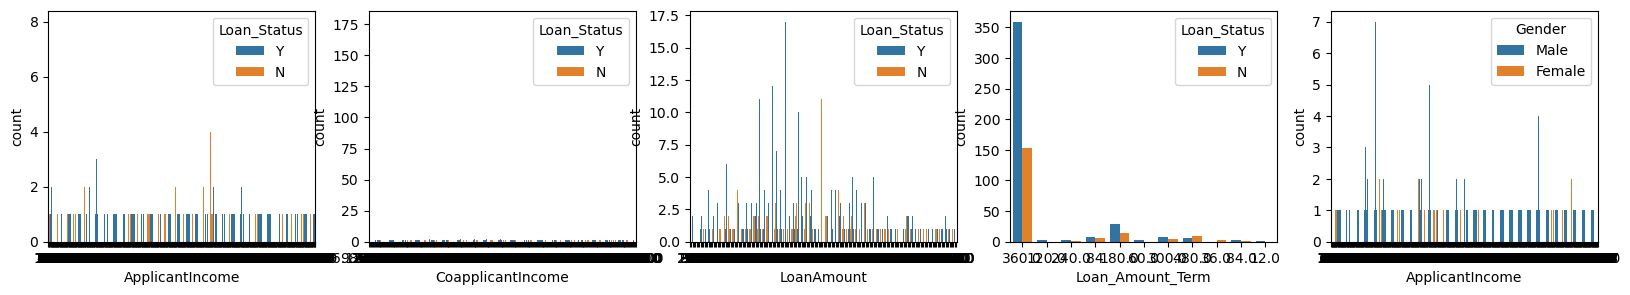

In [19]:
fig, axs = plt.subplots(figsize = (20,3), ncols = 5)
sns.countplot(x = df_train['ApplicantIncome'], hue = df_train['Loan_Status'], fill = True ,ax = axs[0])
sns.countplot(x = df_train['CoapplicantIncome'], hue = df_train['Loan_Status'], fill = True ,ax = axs[1])
sns.countplot(x = df_train['LoanAmount'], hue = df_train['Loan_Status'], fill = True ,ax = axs[2])
sns.countplot(x = df_train['Loan_Amount_Term'], hue = df_train['Loan_Status'], fill = True ,ax = axs[3])
sns.countplot(x = df_train['ApplicantIncome'], hue = df_train['Gender'], fill = True ,ax = axs[4])
plt.show()

Pair Plot

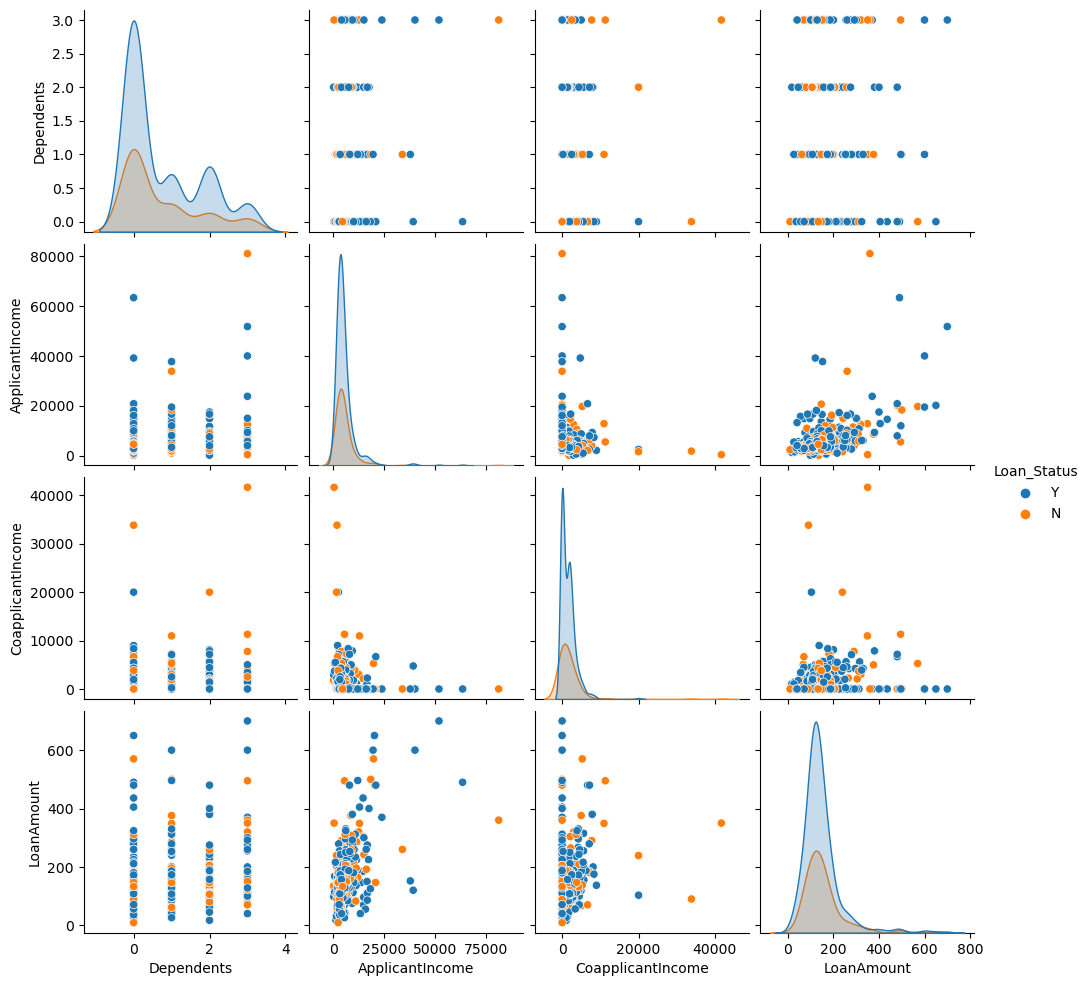

In [20]:
sns.pairplot(df_train, hue='Loan_Status')

Identifying Non-numeric columns in the dataset

In [21]:
obj_col = df_train.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Converting Object to Numeric Datatype

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_train[obj_col] = df_train[obj_col].astype(str)
df_train[obj_col] = oe.fit_transform(df_train[obj_col])
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,6.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,6.0,1.0,2.0,1.0


Statistical Summary of the dataset

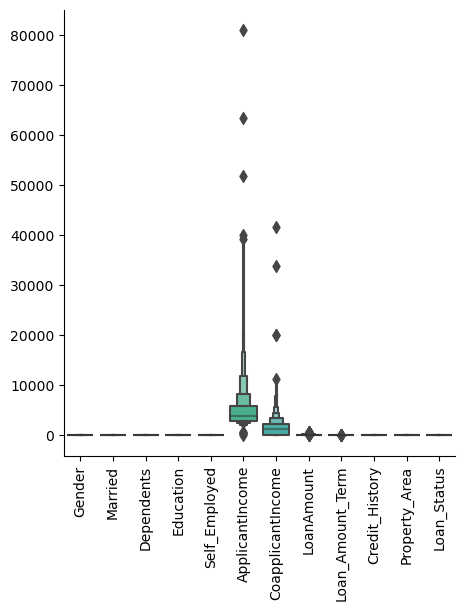

In [23]:
sns.catplot(data = df_train, kind = 'boxen')
plt.xticks(rotation = 90)
plt.show()

HeatMap

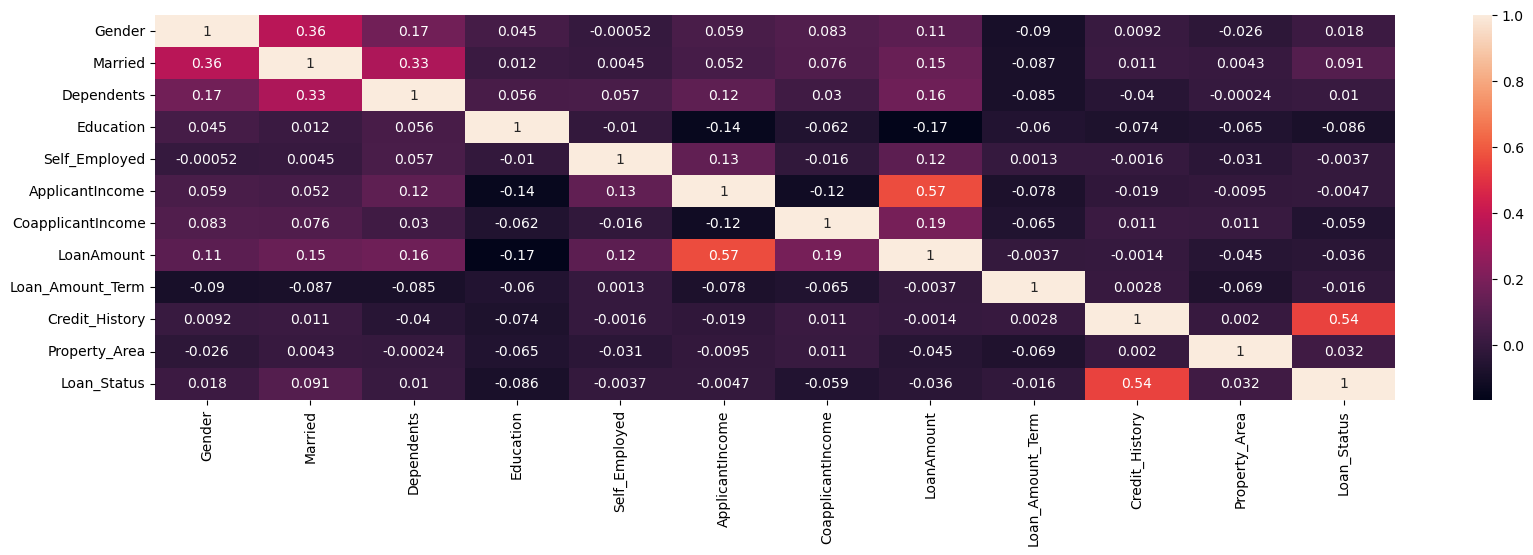

In [24]:
plt.figure(figsize = (20,5))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train.iloc[:,:-1] = sc.fit_transform(df_train.iloc[:,:-1])
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


Splitting the data for Training and Testing

In [26]:
x = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=32, test_size=0.3, stratify=y)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test, y_test)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(y_test,y_pred), "\nClassification Report: \n", classification_report(y_test, y_pred), '\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    print()
    print()
    return model

KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy
Accuracy:  0.7621621621621621 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.41      0.52        58
         1.0       0.77      0.92      0.84       127

    accuracy                           0.76       185
   macro avg       0.74      0.67      0.68       185
weighted avg       0.75      0.76      0.74       185
 
Confusion Matrix: 
 [[ 24  34]
 [ 10 117]]
Training Accuracy: 0.8461538461538461
Testing Accuracy: 0.7621621621621621




SVM Model

In [30]:
from sklearn.svm import SVC
svc = mymodel(SVC())

SVC Accuracy
Accuracy:  0.7783783783783784 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.34      0.49        58
         1.0       0.77      0.98      0.86       127

    accuracy                           0.78       185
   macro avg       0.82      0.66      0.68       185
weighted avg       0.80      0.78      0.74       185
 
Confusion Matrix: 
 [[ 20  38]
 [  3 124]]
Training Accuracy: 0.8321678321678322
Testing Accuracy: 0.7783783783783784




Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy
Accuracy:  0.7027027027027027 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.53      0.47      0.50        58
         1.0       0.77      0.81      0.79       127

    accuracy                           0.70       185
   macro avg       0.65      0.64      0.64       185
weighted avg       0.69      0.70      0.70       185
 
Confusion Matrix: 
 [[ 27  31]
 [ 24 103]]
Training Accuracy: 1.0
Testing Accuracy: 0.7027027027027027




Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy
Accuracy:  0.772972972972973 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.34      0.49        58
         1.0       0.76      0.97      0.85       127

    accuracy                           0.77       185
   macro avg       0.80      0.66      0.67       185
weighted avg       0.79      0.77      0.74       185
 
Confusion Matrix: 
 [[ 20  38]
 [  4 123]]
Training Accuracy: 0.8275058275058275
Testing Accuracy: 0.772972972972973




Gaussian Naive Bayes Model

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = mymodel(GaussianNB())

GaussianNB Accuracy
Accuracy:  0.7675675675675676 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.36      0.49        58
         1.0       0.77      0.95      0.85       127

    accuracy                           0.77       185
   macro avg       0.77      0.66      0.67       185
weighted avg       0.77      0.77      0.74       185
 
Confusion Matrix: 
 [[ 21  37]
 [  6 121]]
Training Accuracy: 0.8205128205128205
Testing Accuracy: 0.7675675675675676




Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = mymodel(RandomForestClassifier(n_estimators=8, max_depth=10, min_samples_leaf=12))

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators= Accuracy
Accuracy:  0.7837837837837838 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.36      0.51        58
         1.0       0.77      0.98      0.86       127

    accuracy                           0.78       185
   macro avg       0.82      0.67      0.69       185
weighted avg       0.80      0.78      0.75       185
 
Confusion Matrix: 
 [[ 21  37]
 [  3 124]]
Training Accuracy: 0.8205128205128205
Testing Accuracy: 0.7837837837837838




Accuracies

KNN = 76.21%

SVM = 77.83%

Decision Tree = 70.27%

Logistic Regression = 77.29%

Naive Bayes = 76.75%

Random Forest = 78.37%

Dataset : https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset